In [1]:
import numpy as np
import pandas as pd

from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

import os

<h1> Prepare Data </h1>

In [2]:
img_names = os.listdir("../weekly project 7/train")

In [3]:
# While checking the data manually, I regconize that the image was named like "cat.01.jpg",
# So it suitable to write a function to split the "cat" and "dog" word out and making label from them.

In [4]:
img_dict= []
for img_name in img_names:
    name= img_name.split('.')[0]
    if name == 'dog':
        img_dict.append(1)
    else: img_dict.append(0)
df= pd.DataFrame({'Name': img_names,
                 'Category': img_dict})

<h3> Check if the split work </h3>

In [5]:
name= img_name.split('.')[0]
name

'dog'

<h3> Check the data </h3>

In [6]:
df.sample(10)

,Name,Category
20386,dog.5846.jpg,1
9382,cat.7192.jpg,0
17095,dog.2884.jpg,1
6285,cat.4404.jpg,0
16593,dog.2431.jpg,1
23710,dog.8838.jpg,1
10392,cat.8100.jpg,0
19324,dog.4890.jpg,1
11726,cat.9301.jpg,0
2368,cat.12128.jpg,0


<AxesSubplot:>

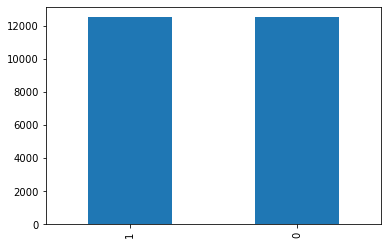

In [7]:
df['Category'].value_counts().plot.bar()

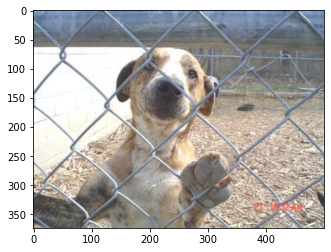

In [8]:
sample = random.choice(img_names)
image = load_img("../weekly project 7/train/"+sample)
plt.imshow(image)

In [9]:
df['Category'].replace({0: 'cat',
                       1: 'dog'}, inplace= True)

In [10]:
df.sample(10)

,Name,Category
17184,dog.2964.jpg,dog
21882,dog.7192.jpg,dog
13691,dog.11069.jpg,dog
10079,cat.782.jpg,cat
12055,cat.9599.jpg,cat
66,cat.10056.jpg,cat
3740,cat.2113.jpg,cat
21658,dog.6991.jpg,dog
9826,cat.7592.jpg,cat
20714,dog.6140.jpg,dog


<AxesSubplot:>

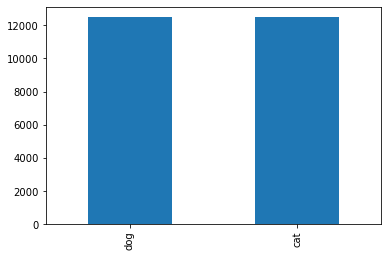

In [11]:
df['Category'].value_counts().plot.bar()

<h3> Split the set </h3>

In [12]:
train_set, val_set = train_test_split(df, test_size=0.20, random_state=42)

In [13]:
total_train= train_set.shape[0]

In [14]:
train_set['Category'].value_counts()

dog    10015
cat     9985
Name: Category, dtype: int64

In [15]:
val_total= val_set.shape[0]
val_total

5000

In [16]:
val_set['Category'].value_counts()

cat    2515
dog    2485
Name: Category, dtype: int64

In [17]:
val_set

,Name,Category
6868,cat.493.jpg,cat
24016,dog.9112.jpg,dog
9668,cat.745.jpg,cat
13640,dog.11022.jpg,dog
14018,dog.11363.jpg,dog
...,...,...
8670,cat.6551.jpg,cat
11839,cat.9403.jpg,cat
4013,cat.236.jpg,cat
21147,dog.6530.jpg,dog


<h3>ImageDataGenerator & Flow from dataframe</h3>

In [18]:
# Image DataGenerator can generate batches of tensor image data with real-time data augmentation.
# But in this situation, I'm only using it to rescale image

In [19]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

In [43]:
train_datagen= ImageDataGenerator(rescale= 1./255, 
                                 rotation_range= 15, 
                                 horizontal_flip=True, 
                                 vertical_flip= True,
                                 width_shift_range=0.2, 
                                 height_shift_range=0.2)

In [21]:
# Binary because of 2 classes, "cat" and "dog"

In [22]:
# Most of the Image datasets has 2 common formats:
# The first common format contains all the images within separate folders named after their respective class names.
# Therefore we can use flow_from_directory function to easily the images read from the disc and perform powerful on the fly image augmentation with the ImageDataGenerator.
# flow_from_dataframe allows you to input a Pandas dataframe which contains the filenames(with or without the extensions) column and a column which has the class names and directly read the images from the directory with their respective class names mapped

In [48]:
train_gen= train_datagen.flow_from_dataframe(train_set,
                                             "../weekly project 7/train/",
                                            x_col='Name',
                                            y_col='Category',
                                            target_size= (192,192),
                                            class_mode="binary",
                                            batch_size= 32,
                                            shuffle= True,
                                            seed= 42
                                            )

Found 20000 validated image filenames belonging to 2 classes.


In [50]:
val_datagen= ImageDataGenerator(rescale= 1./255)

In [51]:
val_gen= val_datagen.flow_from_dataframe(val_set,
                                         "../weekly project 7/train/",
                                         x_col='Name',
                                         y_col='Category',
                                         target_size= (192,192),
                                         class_mode='binary',
                                         batch_size= 32,
                                         shuffle= False,
                                         seed= 42
                                        )

Found 5000 validated image filenames belonging to 2 classes.


<h1> Create Model</h1>

<h3> 128 x 128 x 128 x 128 x 128 x 128 x 1 Layers </h3>

In [52]:
import tensorflow as tf
import math

In [53]:
model= tf.keras.models.Sequential([
                                     tf.keras.layers.Flatten(input_shape= (192,192,3)),
                                     tf.keras.layers.Dense(128, activation='relu'),
                                     tf.keras.layers.Dense(128, activation='relu'),
                                     tf.keras.layers.Dense(128, activation='relu'),
                                     tf.keras.layers.Dense(128, activation='relu'), 
                                     tf.keras.layers.Dense(128, activation='relu'),
                                     tf.keras.layers.Dense(128, activation='relu'),
                                     tf.keras.layers.Dense(1, activation='sigmoid'),
  ])

In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 110592)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               14155904  
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_13 (Dense)             (None, 128)              

In [56]:
callback= tf.keras.callbacks.EarlyStopping(monitor= 'val_loss', patience= 5)

In [57]:
# Learning rate = 1e-4

In [58]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= 1e-4), 
              loss= 'binary_crossentropy', 
              metrics= ['accuracy']
             )

In [59]:
history= model.fit(train_gen, 
                   validation_data= val_gen, 
                   epochs= 40,
                   steps_per_epoch= tf.math.ceil(len(train_set)/32).numpy(),
                   validation_steps= tf.math.ceil(len(val_set)/32).numpy(),
                   callbacks= callback
                  )

Epoch 1/40
625/625 [==============================] - 166s 265ms/step - loss: 0.6985 - accuracy: 0.5270 - val_loss: 0.7220 - val_accuracy: 0.5084
Epoch 2/40
625/625 [==============================] - 170s 271ms/step - loss: 0.6888 - accuracy: 0.5428 - val_loss: 0.6849 - val_accuracy: 0.5534
Epoch 3/40
625/625 [==============================] - 191s 306ms/step - loss: 0.6840 - accuracy: 0.5518 - val_loss: 0.6850 - val_accuracy: 0.5496
Epoch 4/40
625/625 [==============================] - 181s 289ms/step - loss: 0.6830 - accuracy: 0.5603 - val_loss: 0.6789 - val_accuracy: 0.5760
Epoch 5/40
625/625 [==============================] - 173s 277ms/step - loss: 0.6780 - accuracy: 0.5643 - val_loss: 0.6770 - val_accuracy: 0.5684
Epoch 6/40
625/625 [==============================] - 181s 290ms/step - loss: 0.6756 - accuracy: 0.5660 - val_loss: 0.6917 - val_accuracy: 0.5376
Epoch 7/40
625/625 [==============================] - 167s 268ms/step - loss: 0.6743 - accuracy: 0.5628 - val_loss: 0.6724 -

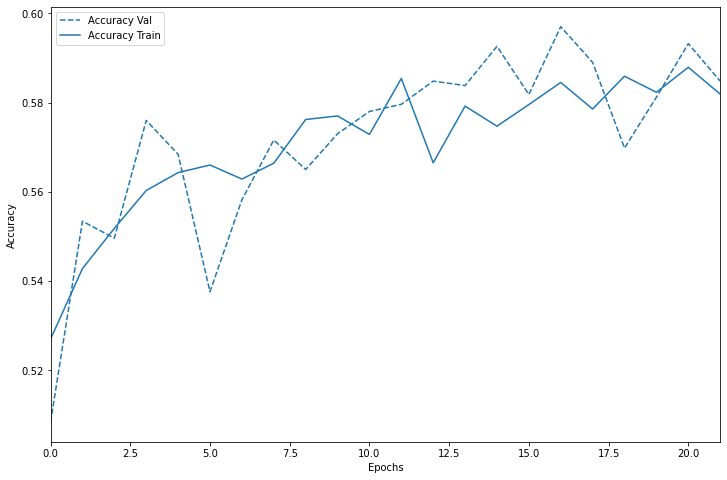

In [61]:
def plot_history(history, key='loss'):
    plt.figure(figsize=(12,8))

    val = plt.plot(history.epoch, history.history['val_'+key],'--', label=key.title() +' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(), label=key.title() + ' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])

plot_history(history, key='accuracy')

In [70]:
model.save('Hoang_Nguyen.h5')

<h1> Transfer Learning </h1>

<h2> Mobile Net </h2>

In [62]:
mobile_net = tf.keras.applications.MobileNetV2(input_shape=(192, 192, 3), include_top=False)
mobile_net.trainable=False 

In [63]:
mobile_model = tf.keras.Sequential([
                            mobile_net,
                            tf.keras.layers.GlobalAveragePooling2D(),
                            tf.keras.layers.Dense(1, activation = 'sigmoid')])

In [64]:
mobile_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_192 (Functi (None, 6, 6, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [65]:
mobile_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= 1e-4),
                     loss='binary_crossentropy',
                     metrics=["accuracy"]
                    )

In [66]:
callback2= tf.keras.callbacks.EarlyStopping(monitor= 'val_loss', patience= 5)

In [67]:
history2 = mobile_model.fit(train_gen, 
                           validation_data= val_gen, 
                           epochs= 40,
                           steps_per_epoch= tf.math.ceil(len(train_set)/32).numpy(),
                           validation_steps= tf.math.ceil(len(val_set)/32).numpy(),
                           callbacks= callback2
                          )

Epoch 1/40
625/625 [==============================] - 162s 260ms/step - loss: 0.3958 - accuracy: 0.8229 - val_loss: 0.1637 - val_accuracy: 0.9522
Epoch 2/40
625/625 [==============================] - 161s 257ms/step - loss: 0.2509 - accuracy: 0.8982 - val_loss: 0.1242 - val_accuracy: 0.9590
Epoch 3/40
625/625 [==============================] - 161s 258ms/step - loss: 0.2192 - accuracy: 0.9112 - val_loss: 0.1115 - val_accuracy: 0.9608
Epoch 4/40
625/625 [==============================] - 161s 258ms/step - loss: 0.2025 - accuracy: 0.9174 - val_loss: 0.1038 - val_accuracy: 0.9630
Epoch 5/40
625/625 [==============================] - 161s 258ms/step - loss: 0.1907 - accuracy: 0.9236 - val_loss: 0.1003 - val_accuracy: 0.9640
Epoch 6/40
625/625 [==============================] - 161s 258ms/step - loss: 0.1838 - accuracy: 0.9257 - val_loss: 0.0979 - val_accuracy: 0.9650
Epoch 7/40
625/625 [==============================] - 161s 258ms/step - loss: 0.1766 - accuracy: 0.9298 - val_loss: 0.0943 -

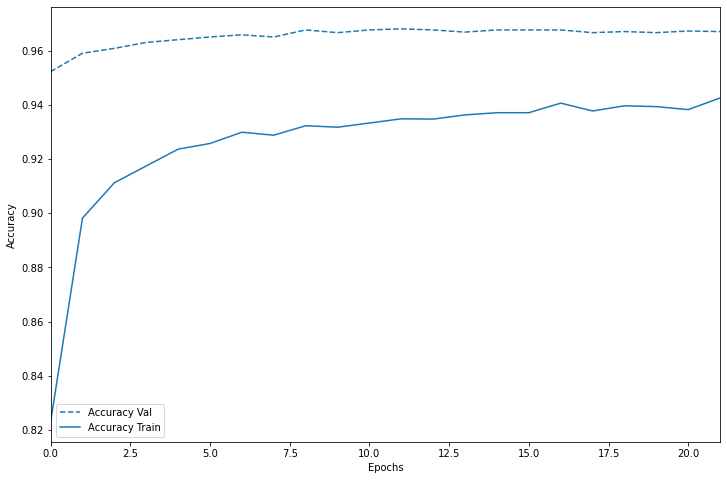

In [68]:
def plot_history(history, key='loss'):
    plt.figure(figsize=(12,8))

    val = plt.plot(history2.epoch, history2.history['val_'+key],'--', label=key.title() +' Val')
    plt.plot(history2.epoch, history2.history[key], color=val[0].get_color(), label=key.title() + ' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])

plot_history(history, key='accuracy')

In [69]:
mobile_model.save('Hoang_Nguyen_Mobile_net.h5')